<a href="https://colab.research.google.com/github/ad-aditisingh/gold-jewellery-price-predictor-india/blob/main/04_multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv("jewellery_price_india.csv")
df.head()


,date,gold_rate_per_gram_22k,weight_grams,making_charge_pct,jewellery_price
0,2025-10-21,10659.199246,19.977926,24.162143,272333.707928
1,2025-10-21,10659.199246,37.135709,18.177194,481822.639096
2,2025-10-21,10659.199246,9.488895,10.651907,115275.320014
3,2025-10-21,10659.199246,4.788013,22.724994,64513.437309
4,2025-10-21,10659.199246,30.853521,20.037234,406614.171234


In [4]:
X = df[[
    "gold_rate_per_gram_22k",
    "weight_grams",
    "making_charge_pct"
]]

y = df["jewellery_price"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

intercept = model.intercept_

coefficients, intercept


(                  Feature  Coefficient
 0  gold_rate_per_gram_22k    30.560026
 1            weight_grams  5003.889265
 2       making_charge_pct  1086.654613,
 np.float64(-145745.8374914692))

In [8]:
y_pred = model.predict(X_test)


In [9]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 18041.22060411001
RMSE: 29081.25147990543
R² Score: 0.903376264879893


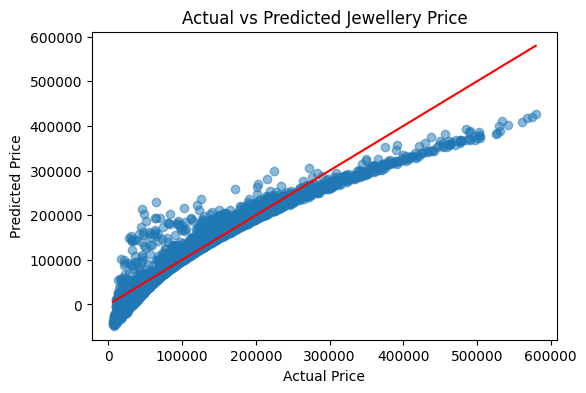

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Jewellery Price")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")
plt.show()


Multiple Linear Regression (sklearn)

Used gold rate, weight, and making charges as features

Trained Linear Regression using sklearn

Achieved high R² indicating strong linear relationship

Model coefficients are interpretable and business-friendly

In [11]:
import joblib

joblib.dump(model, "linear_regression_jewellery_model.pkl")


['linear_regression_jewellery_model.pkl']

In [12]:
import os
os.listdir()


['.config',
 'gold_price_india_22k_per_gram.csv',
 'jewellery_price_india.csv',
 'linear_regression_jewellery_model.pkl',
 'sample_data']